In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np

## 图像直方图

> cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate ]]) #返回hist

* 第一个参数必须用方括号括起来。 
* 第二个参数是用于计算直方图的通道，这里使用灰度图计算直方图，所以就直接使用第一个通道； 
* 第三个参数是Mask，这里没有使用，所以用None。 
* 第四个参数是histSize，表示这个直方图分成多少份（即多少个直方柱）。第二个例子将绘出直方图，到时候会清楚一点。 
* 第五个参数是表示直方图中各个像素的值，[0.0, 256.0]表示直方图能表示像素值从0.0到256的像素。 

最后是两个可选参数，由于直方图作为函数结果返回了，所以第六个hist就没有意义了（待确定） 最后一个accumulate是一个布尔值，用来表示直方图是否叠加。

要理解直方图，绕不开“亮度”这个概念。人们把照片的亮度分为0到255共256个数值，数值越大，代表的亮度越高。其中0代表纯黑色的最暗区域，255表示最亮的纯白色，而中间的数字就是不同亮度的灰色。人们还进一步把这些亮度分为了5个区域，分别是黑色，阴影，中间调，高光和白色。

直方图中柱子的高度，代表了画面中有多少像素是那个亮度，其实就可以看出来画面中亮度的分布和比例.


## 灰度直方图

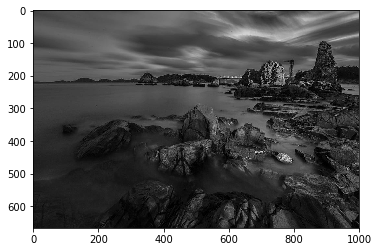

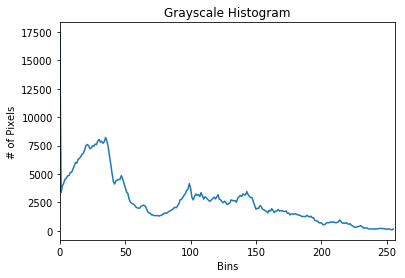

In [50]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np

img = cv2.imread('dark.jpg')

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray, cmap=plt.cm.gray)

hist = cv2.calcHist([img], [0], None, [256], [0, 256])

plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

## 颜色直方图

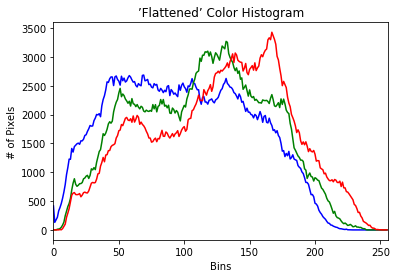

In [54]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np

img = cv2.imread('image800.jpg')

chans = cv2.split(img)
colors = ('b', 'g', 'r')

plt.figure()
plt.title("’Flattened’ Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

for (chan, color) in zip(chans, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color = color)
    plt.xlim([0, 256])
  

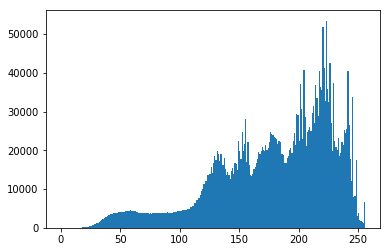

2D histogram shape: (32, 32), with 1024 values
3D histogram shape: (8, 8, 8), with 512 values


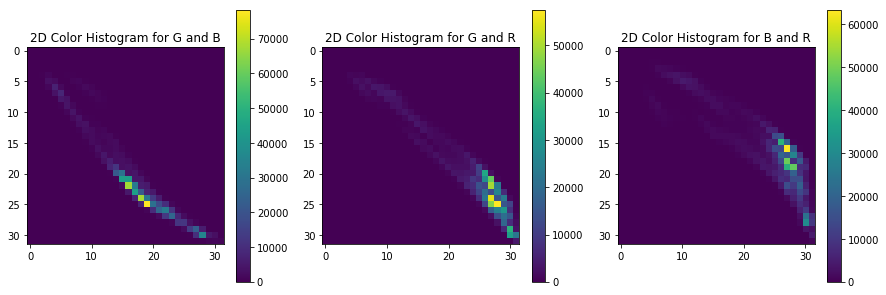

In [41]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
import numpy as np

img = cv2.imread('person.jpg')

# Matplotlib有一个绘制直方图的函数：matplotlib.pyplot.hist() 
plt.hist(img.ravel(),256,[0,256])
plt.show()

chans = cv2.split(img)
colors = ('b', 'g', 'r')

fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None,
     [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)

ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None,
     [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)

ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None,
 [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)


print("2D histogram shape: {}, with {} values".format(hist.shape, hist.flatten().shape[0]))

hist = cv2.calcHist([img], [0, 1, 2],
 None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(hist.shape, hist.flatten().shape[0]))


## 掩膜　直方图

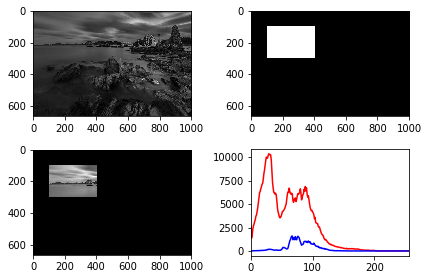

In [49]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('dark.jpg', 0)
 
# create a mask  应用遮罩
mask = np.zeros(img.shape[:2], np.uint8)
mask[100:300, 100:400] = 255
masked_img = cv.bitwise_and(img, img, mask=mask)
 
#Calculate histogram with mask and without mask
# Check third argument for mask
"""
蒙板（掩模） 
将要统计的部分设置成白色，其他部分设置成黑色，就构成了蒙板。然后传递给原图像即可
"""
hist_full = cv.calcHist([img], [0], None, [256], [0,256])
hist_mask = cv.calcHist([img], [0], mask, [256], [0,256])
 
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full, color='r'), plt.plot(hist_mask, color='b')
plt.xlim([0,256])
plt.tight_layout()
plt.show()

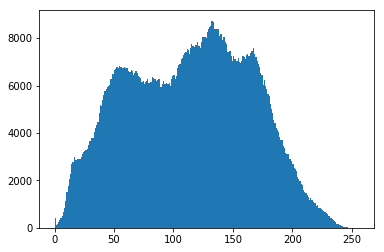

In [39]:
from matplotlib import pyplot as plt
import numpy as np
import argparse
import cv2

image = cv2.imread('aier.jpg')
plt.hist(img.ravel(),256,[0,256])
plt.show()


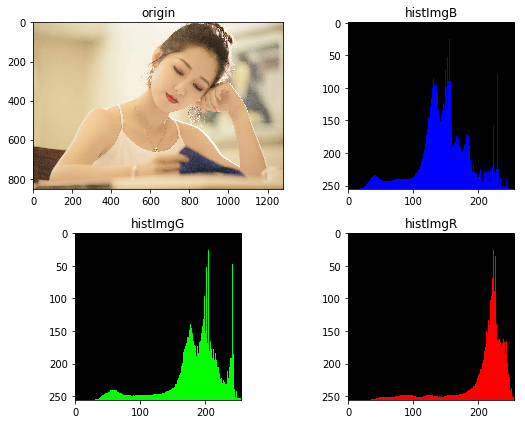

In [61]:
# 彩色图像不同通道的直方图
%matplotlib inline
import cv2    
import numpy as np    
    
img = cv2.imread("person.jpg")    
b, g, r = cv2.split(img) 

def calcAndDrawHist(image, color):  
    hist= cv2.calcHist([image], [0], None, [256], [0.0,255.0])  
    minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(hist)  
    histImg = np.zeros([256,256,3], np.uint8)  
    hpt = int(0.9* 256);  
      
    for h in range(256):  
        intensity = int(hist[h]*hpt/maxVal)  
        cv2.line(histImg,(h,256), (h,256-intensity), color)  
          
    return histImg; 


histImgB = calcAndDrawHist(b, [255, 0, 0])  
histImgG = calcAndDrawHist(g, [0, 255, 0])  
histImgR = calcAndDrawHist(r, [0, 0, 255])  

plt.figure(figsize=(8, 6))
plt.subplot(221)
plt.imshow(img[:,:,::-1]); plt.title('origin')
plt.subplot(222)
plt.imshow(histImgB[:,:,::-1]); plt.title('histImgB')
plt.subplot(223)
plt.imshow(histImgG[:,:,::-1]); plt.title('histImgG')
plt.subplot(224)
plt.imshow(histImgR[:,:,::-1]); plt.title('histImgR')

plt.tight_layout()
plt.show()

# cv2.imshow("histImgB", histImgB)  
# cv2.imshow("histImgG", histImgG)  
# cv2.imshow("histImgR", histImgR)  
# cv2.imshow("Img", img)  

# cv2.waitKey(0)  
# cv2.destroyAllWindows()

## 图像直方图均衡 Histogram equalization 

直方图均衡化就是将原始的直方图拉伸，使之均匀分布在全部灰度范围内，从而增强图像的对比度。
直方图均衡化的中心思想是把原始图像的的灰度直方图从比较集中的某个区域变成在全部灰度范围内的均匀分布。

在OpenCV中，彩色的图像其实是用一个多通道数组来存储的，每个单通道数组中的元素的取值范围都是0到255。这与灰度图中像素的变化范围是相同的。因此对彩色图像进行直方图均衡化只要先将彩色图像分解成若干通道，然后这些通道分别进行直方图均衡化，最后合并所有通道即可。

```
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

def hisEqulColor(img):
    ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
    channels = cv2.split(ycrcb)
    print(len(channels))
    cv2.equalizeHist(channels[0], channels[0])
    cv2.merge(channels, ycrcb)
    cv2.cvtColor(ycrcb, cv2.COLOR_YCR_CB2BGR, img)
    return img

img = cv2.imread('dark.jpg')

equ = hisEqulColor(im)

h_stack_img = np.hstack((img, equ))

plt.figure(figsize=(10, 8))
ax1 = plt.subplot2grid((2,2),(0, 0))
ax1.imshow(img[:,:,::-1])
ax1.set_title('orignal image')

ax1 = plt.subplot2grid((2, 2), (0, 1))
ax1.imshow(equ[:,:,::-1])
ax1.set_title('equalization')

ax1 = plt.subplot2grid((2, 2), (1, 0), colspan=3, rowspan=1)
ax1.imshow(h_stack_img[:,:,::-1])
ax1.set_title('horizational')

plt.tight_layout()
plt.show()

```

> cv2.equalizeHist(src[, dst]) → dst

**cv2.equalizeHist()只提供灰度值图片的处理**


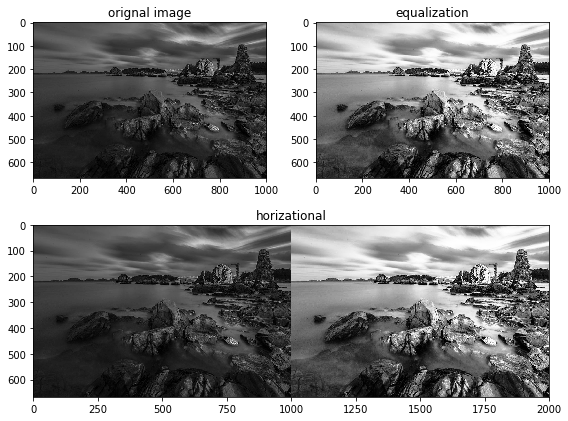

In [87]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('dark.jpg',0)
# histogram equalization
equ = cv2.equalizeHist(img)
# 两个图片的像素分布连接在一起，拍成一维数组
res = np.hstack((img,equ))

plt.figure(figsize=(8, 6))
ax1 = plt.subplot2grid((2,2),(0, 0))
ax1.imshow(img, cmap=plt.cm.gray)
ax1.set_title('orignal image')

ax1 = plt.subplot2grid((2, 2), (0, 1))
ax1.imshow(equ, cmap=plt.cm.gray)
ax1.set_title('equalization')

ax1 = plt.subplot2grid((2, 2), (1, 0), colspan=3, rowspan=1)
ax1.imshow(res, cmap=plt.cm.gray)
ax1.set_title('horizational')

plt.tight_layout()
plt.show()

3


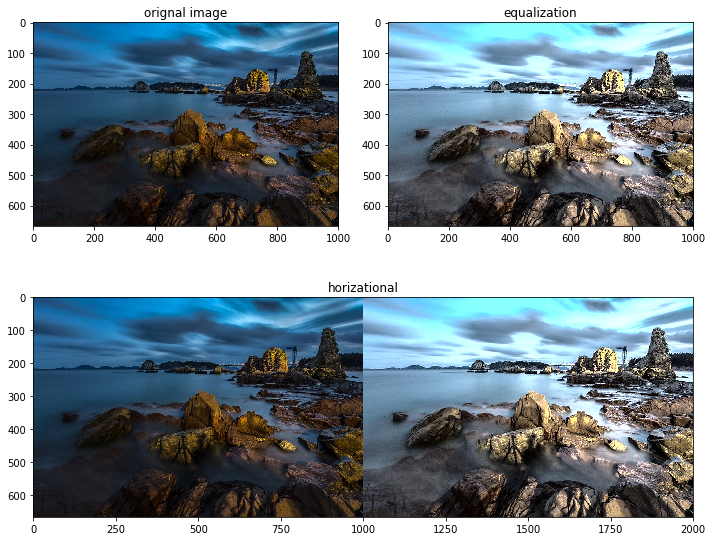

In [86]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

def hisEqulColor(img):
    ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
    channels = cv2.split(ycrcb)
    print(len(channels))
    cv2.equalizeHist(channels[0], channels[0])
    cv2.merge(channels, ycrcb)
    cv2.cvtColor(ycrcb, cv2.COLOR_YCR_CB2BGR, img)
    return img

img = cv2.imread('dark.jpg')

equ = hisEqulColor(im)

h_stack_img = np.hstack((img, equ))

plt.figure(figsize=(10, 8))
ax1 = plt.subplot2grid((2,2),(0, 0))
ax1.imshow(img[:,:,::-1])
ax1.set_title('orignal image')

ax1 = plt.subplot2grid((2, 2), (0, 1))
ax1.imshow(equ[:,:,::-1])
ax1.set_title('equalization')

ax1 = plt.subplot2grid((2, 2), (1, 0), colspan=3, rowspan=1)
ax1.imshow(h_stack_img[:,:,::-1])
ax1.set_title('horizational')

plt.tight_layout()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


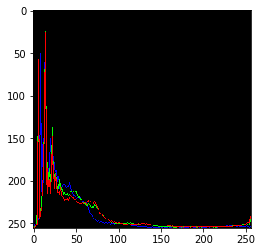

In [53]:
import cv2  
import numpy as np  
       
img = cv2.imread('ai.jpg')  
h = np.zeros((256,256,3)) #创建用于绘制直方图的全0图像  
       
bins = np.arange(256).reshape(256,1) #直方图中各bin的顶点位置  
color = [ (255,0,0),(0,255,0),(0,0,255) ] #BGR三种颜色  
for ch, col in enumerate(color):  
    originHist = cv2.calcHist([img], [ch], None, [256], [0,256])  
    cv2.normalize(originHist, originHist, 0, 255*0.9, cv2.NORM_MINMAX)  
    
    hist = np.int32(np.around(originHist))  
    pts = np.column_stack((bins,hist))  
    cv2.polylines(h,[pts],False,col)  
       
h=np.flipud(h)  
       
plt.imshow(h[:,:,::-1])

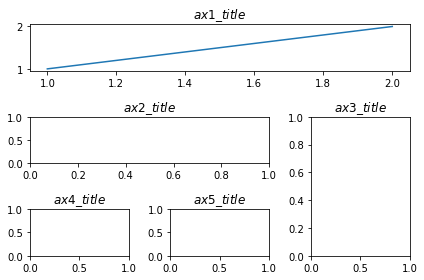

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

plt.figure()
# 第一个元素表示将总的面板进行划分，划分为3行3列，
# 第二个元素表示该面板从0行0列开始，列的跨度（colspan）为3列，行的跨度（rowspan）为1
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=3, rowspan=1)
# 第一个元素的表示X的范围为[1,2]，第二个元素表示Y的范围为[1,2]
ax1.plot([1, 2], [1, 2])
ax1.set_title(r'$ax1\_title$')
# 第一个元素表示将总的面板进行划分，划分为3行3列，
# 第二个元素表示该面板从1行0列开始，列的跨度（colspan）为2列，行的跨度（rowspan）取默认值1
ax2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
ax2.set_title(r'$ax2\_title$')
# 第一个元素表示将总的面板进行划分，划分为3行3列，
# 第二个元素表示该面板从1行2列开始，行的跨度（rowspan）为2列，列的跨度（colspan）取默认值1
ax3 = plt.subplot2grid((3, 3), (1, 2), rowspan=2)
ax3.set_title(r'$ax3\_title$')
# 第一个元素表示将总的面板进行划分，划分为3行3列，
# 第二个元素表示该面板从2行0列开始,行的跨度（rowspan）为2列，列的跨度（colspan）取默认值1
ax4 = plt.subplot2grid((3, 3), (2, 0))
ax4.set_title(r'$ax4\_title$')
# 第一个元素表示将总的面板进行划分，划分为3行3列，
# 第二个元素表示该面板从2行1列开始,行的跨度（rowspan）为2列，列的跨度（colspan）取默认值1
ax5 = plt.subplot2grid((3, 3), (2, 1))
ax5.set_title(r'$ax5\_title$')

plt.tight_layout()
plt.show()